## Population Genetics Exercise 1: Modeling Genetic Drift

### Context
The zygotes (cells resulting from the combination of one egg gamete and one sperm gamete) of one generation are formed from a sub-sampling of gametes from the parental population. This sub-sample inevitably is an imperfect representation of the alleles found in the parental population. **This sampling error results in chance fluctuations in allele frequency across generations, known as genetic drift.**

Genetic drift is one of the five forces that can cause evolutionary change - the loss (where the allele frequency becomes 0) versus fixation (the allele frequency becomes 1) of an allele can be caused by genetic drift.

For this exercise (and all other exercises), we'll consider a hypothetical gene with two different alleles designated A and a. The A allele encodes a dominant phenotype of interest, while the a allele encodes a recessive phenotype of interest.

Quantitatively, we can think of the drawing of the alleles A and a for our hypothetical gene in gametes as Bernoulli binomial sampling, so the expected change in the allele frequency of a ***selectively neutral* allele A** (which we will designate in the code below as the variable p) corresponds to the variance of the binomial distribution.

**Reminder:** selectively neutral here means there is no selective advantage or disadvantage to an organism with the allele A that displays the dominant phenotype.

<h3>Running Code Cells</h3>
If you've never used a Jupyter notebook on Google Colab before, here's a quick orientation:

Below are code cells containing Python code below that you will want to run.

You can run code cells individually in Colab by:
- clicking on a code cell and hitting the "Run" button (depicted as the "play" arrow icon) to the top left of the cell
- clicking on a code cell and hitting Cmd/Ctrl+Enter/Return

You can run all code cells in this notebook in Colab by:
- clicking on "Runtime" in the top navigation bar and select "Run all"

You can edit code within a code cell by clicking into it and then deleting/typing text

### Run the following code cell below to import the libraries needed to run the simulation!

In [6]:
#this code imports several important libraries for our modeling of genetic drift
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### Code/Parameters We Invite You To Adjust!

### We encourage you to adjust the numbers for the following 3 variables in the code below:

1. **p** (default 0.5) - this is the starting allele frequency of the selectively neutral allele A. Try adjusting this value to any number between 0 and 1.

2. **N** (default 5 individuals) - this indicates the effective population size. Try adjusting this value to simulate small and large populations.

3. **replicate_population** (default 5 populations) - this is how many populations are simulated. Try adjusting this value to control how many graphs you output.

You can adjust the strength of genetic drift (by changing N, the population size) and how many populations are plotted (by changing the number of replicate_population).

### Each time you would like to run a new simulation, change the values of the variable(s) of interest and run the code cell below, and then rerun the following code cell outputting the graphs (in the next section) to visualize the effects of the changing parameters.


In [7]:
#this code designates 4 important parameters (defined below!)

#try out different values for p (starting allele frequency of A), N (population size) and replicate_population!
p = 0.5 #starting allele frequency of the selectively neutral allele A for our hypothetical gene of interest (default is 0.5; try adjusting!)
N = 5 #population size (default is 5; try adjusting!)
replicate_population = 5 #number of replication simulations (graphs) that will be output (default is 5; try adjusting!)

#keep these variables constant for now!
ngen = 30 #number of generations, which will correspond to the x-axis in our output graphs

#this code defines a function (drift_sim) that we will use to visualize genetic drift
def drift_sim(N, p, ngen):
    f_init = p #record the initial allele frequency
    fvec = [p] #store the allele frequency over time
    f_A = p
    for _ in range(ngen-1):
        A = np.random.binomial(2*N, f_A)
        f_A = A / (2*N)
        fvec.append(f_A)
    # create a list of allele frequency p over time
    f_over_time = [f_init] + fvec
    # write out
    return f_over_time

## Visualization
The graph(s) output by the code cell below each show a simulation of how genetic drift can act on the allele frequency of a selectively neutral allele A over 30 generations.

###  You do not need to alter any of the code within this block, just click the “Run” button to view your graph(s). You can save the output graph(s) from a run by opening the image in a new tab.

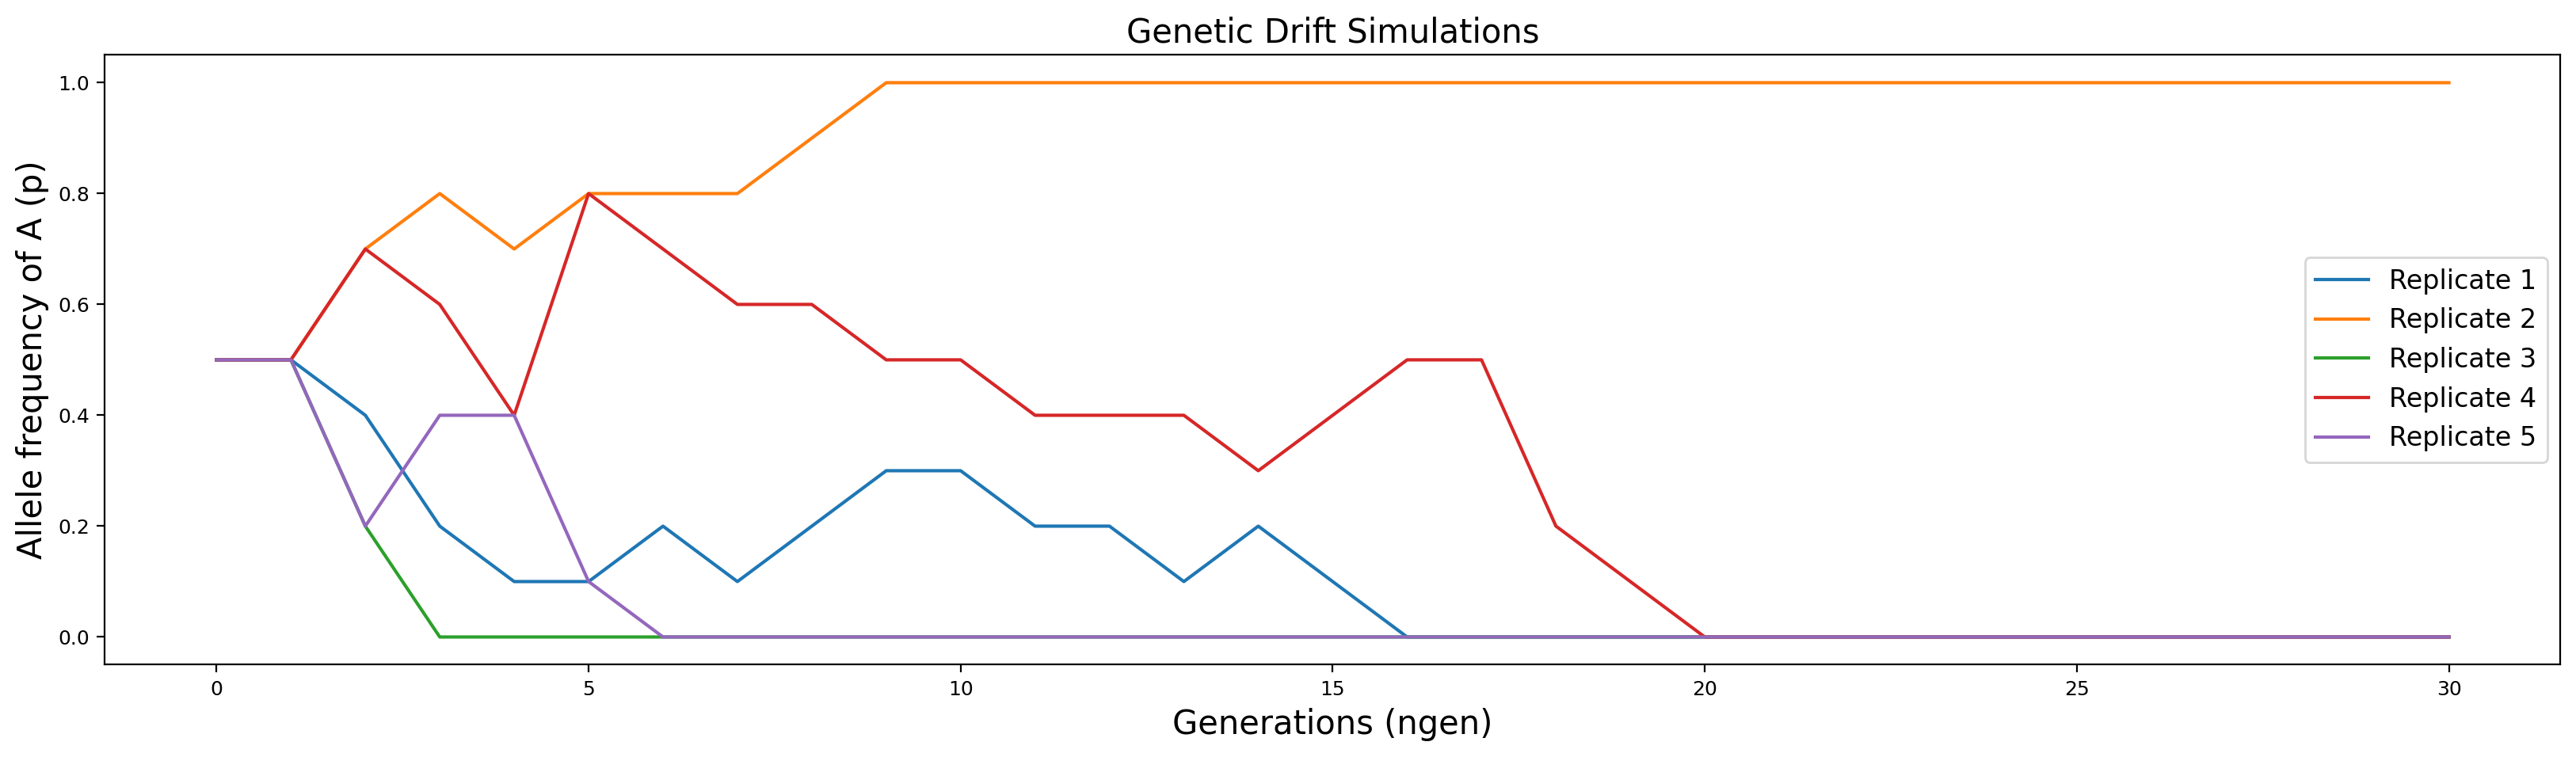

In [18]:
#this code sets some formatting for the graphs you'll output below!
#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (20,5) #figure size (length, height) in inches

small_size = 9
medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=small_size)     # xtick labels
plt.rc('ytick', labelsize=small_size)     # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=small_size)    # figure title

for i in range(replicate_population):
    plt.plot(np.linspace(0, ngen, ngen+1), drift_sim(N=N, p=p, ngen=ngen), label = f"Replicate {i+1}")

plt.title( 'Genetic Drift Simulations') # title
plt.xlabel('Generations (ngen)') # x-axis label
plt.ylabel('Allele frequency of A (p)')# y-axis label
plt.legend()
plt.show()
